In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


C:\Users\Sean\Anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [53]:
Y = df['emotion'].values.astype(np.int32)

X = []
for i in range(len(df)):
    line = df.loc[i, 'pixels']
    # print(line)
    pixels = [p for p in line.split()]
    X.append(pixels)
X = np.array(X).astype(np.float32) / 255.0  # pixel value 

'''
關於標準化:
畫素質理應是正值，理應除上maxnum value做標準化
但做standardization 的話會比較好train，因為會通過sigmoid的關係

In [54]:
print('X, Y: ', X.shape, Y.shape)

X, Y:  (35887, 2304) (35887,)


In [64]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

labels_dict = { i:label_map[i] for i in range(len(label_map)) }

In [69]:
X[2]

array([0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
       0.59607846], dtype=float32)

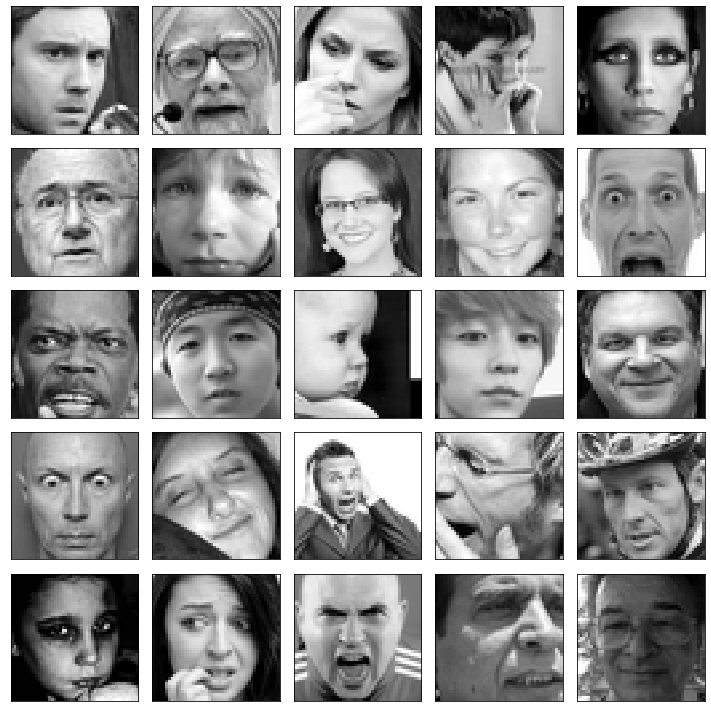

In [70]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
ax = ax.flatten()

for i in range(25):
    img = X[i].reshape(48, 48) 
    ax[i].imshow(img, cmap="gray")     #cmap="gray" / cmap="Greys"  --> 正片模式 / 負片模式
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()